<a href="https://colab.research.google.com/github/Cheese-5040/python_projects/blob/master/Regression_analysis_in_college_major_and_salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded=files.upload()


Saving salaries-by-college-type.csv to salaries-by-college-type (1).csv


In [24]:
import csv
import io
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from scipy.stats import norm
from statistics import mean
import numpy as np
from io import StringIO

df=pd.read_csv(io.BytesIO(uploaded['salaries-by-college-type.csv']),nrows=269)

x_label='Starting Median Salary'
y_label='Mid-Career Median Salary'
x=df[x_label]
y=df[y_label]
x1=[]
y1=[]

for i in range (269):
    x1.append(int(x[i][1:-7]+x[i][-6:-3]))
for i in range (269):
    y1.append(int(y[i][1:-7]+y[i][-6:-3]))

xn=np.array(x1,dtype=np.float64)
x_mean=np.mean(xn)

yn=np.array(y1,dtype=np.float64)
y_mean=np.mean(yn)

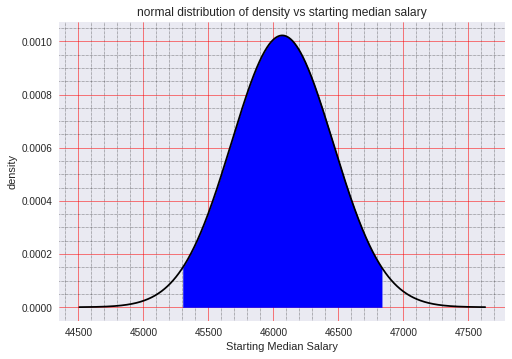

the point estimate is : 46068.40148698885
the standard deviation is : 6400.68578244928
the standard error is : 390.25669983769586
The z score is:  1.959963984540054
the margin of error is :  764.8890764073423
the confidence interval is : 45303.512410581505 46833.29056339619
The confidence interval is 95%


In [13]:
from matplotlib import style
#select a beautiful style to use
style.use('seaborn')

#initialising variables
meu=x_mean #change these variables later
SD=np.std(xn)
SE=SD/np.sqrt(269)


def confidence_interval(xbar,SE,percentage):
    global z
    k=(1-percentage)/2
    z=stats.norm.isf(k)
    #inverse survival function is finding the z score when we know what is 1-cdf
    lowbound = xbar - z*SE
    highbound = xbar + z*SE
    return lowbound,highbound,z*SE
k=confidence_interval(meu,SE,0.95)


#shading the region for confidence interval
x=np.arange(meu-z*SE,meu+z*SE,0.001)#enter the range of x for the shaded region
y=norm.pdf(x,meu,SE)#find the y value for the corresponding x value in the z score

#build the plot
#setting the domain of the plot,-4SE to 4SE away from mean
domain=np.linspace(meu-4*SE,meu+4*SE,1000)
plt.plot(domain, norm.pdf(domain,meu, SE),color="black")
plt.title("normal distribution of density vs starting median salary")
plt.xlabel(x_label)
plt.ylabel("density")

#add the shaded area to represent probability
plt.fill_between(x,y,color='b')

#turning on minor ticks on the distribution for better visualisation
plt.minorticks_on()

#having a grid on the distribution
plt.grid(which='major',linestyle='-',linewidth='0.5',color='red')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

print("the point estimate is :", meu)
print("the standard deviation is :", SD)
print("the standard error is :", SE)
print("The z score is: ", z)
print("the margin of error is : ",  k[2] )
print("the confidence interval is :",k[0],k[1])
print("The confidence interval is 95%")

In [14]:
#statistical significance test
#initialise variables
x_label='Starting Median Salary'
x=df[x_label]
x1=[]
engineering=[]
liberal_arts=[]
for i in range (0,268):
    x1.append(int(x[i][1:-7]+x[i][-6:-3]))

xn=np.array(x1,dtype=np.float64)

#find the values for engineering major
for j in range (19):
  engineering.append(int(x[j][1:-7]+x[j][-6:-3]))
#print(engineering)
#find mean of engineering major
engineering_mean=np.mean(engineering)
#find standard deviation of salary
engineering_SD=np.std(engineering)
#find sample size
engineering_size=int(len(engineering))

#find values for liberal arts major
for j in range (39,86):
  liberal_arts.append(int(x[j][1:-7]+x[j][-6:-3]))
#print(liberal_arts)
#find mean of liberal arts major
arts_mean=np.mean(liberal_arts)
#find standard deviation of salary
arts_SD=np.std(liberal_arts)
#find sample size
arts_size=int(len(liberal_arts))


print("the mean of engineering major starting median salary is : ", engineering_mean)
print("the standard deviation for engineering major starting median salary is : ", engineering_SD)
print("the sample size for engineering graduates is : ", engineering_size)

print("the mean of Liberal Arts major starting median salary is : ", arts_mean)
print("the standard deviation for Liberal Arts major starting median salary is ; ", arts_SD)
print("the sample size for Liberal Arts graduates is : ",arts_size)

the mean of engineering major starting median salary is :  59057.89473684211
the standard deviation for engineering major starting median salary is :  7633.741980215117
the sample size for engineering graduates is :  19
the mean of Liberal Arts major starting median salary is :  45746.8085106383
the standard deviation for Liberal Arts major starting median salary is ;  4322.127680522185
the sample size for Liberal Arts graduates is :  47


In [15]:
#two tailed test
tails=2
print("the null hypothesis is mean of starting median salary engineering =\
 liberal")
print("Ha: the means are different")
null_value= 0
point_estimate= engineering_mean-arts_mean
print("PE : ",point_estimate)
DOF = engineering_size-1
engineering_SE= engineering_SD/ np.sqrt(engineering_size)
print("Eng SE : ",engineering_SE)
arts_SE= arts_SD/ np.sqrt(arts_size)
print("Art SE : ",arts_SE)
SE=np.sqrt(engineering_SE**2+arts_SE**2)
print("pooled SE : ",SE)
T=(point_estimate - null_value)/SE
print("T-value : ",T)
print("p-value : ",tails*(1-stats.t.cdf(T,DOF)))


the null hypothesis is mean of starting median salary engineering = liberal
Ha: the means are different
PE :  13311.086226203806
Eng SE :  1751.3005185695663
Art SE :  630.4471173721832
pooled SE :  1861.3213247972333
T-value :  7.151417677790736
p-value :  1.164461445490872e-06


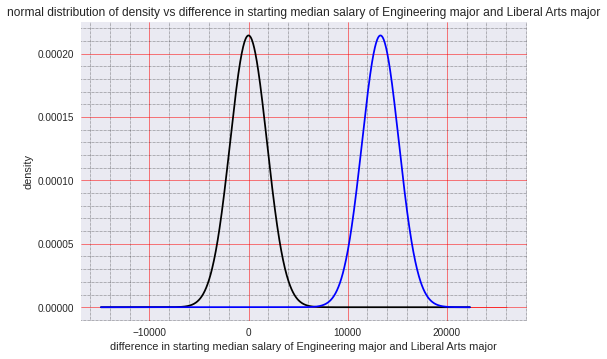

In [16]:
#shading the region 
x=np.arange(null_value+T*SE,null_value+14*SE,0.001)#enter the range of x for the shaded region
y=norm.pdf(x,null_value,SE)#find the y value for the corresponding x value in the z score
x_label="difference in starting median salary of Engineering major and Liberal Arts major"
#build the plot
#setting the domain of the plot,-4SE to 4SE away from mean
domain=np.linspace(null_value-8*SE,null_value+12*SE,1000)
plt.plot(domain, norm.pdf(domain,null_value, SE),color="black")
plt.plot(domain, norm.pdf(domain,point_estimate, SE),color="blue")
plt.title("normal distribution of density vs difference in starting median \
salary of Engineering major and Liberal Arts major")
plt.xlabel(x_label)
plt.ylabel("density")


#add the shaded area to represent probability
plt.fill_between(x,y,color='r')

#turning on minor ticks on the distribution for better visualisation
plt.minorticks_on()

#having a grid on the distribution
plt.grid(which='major',linestyle='-',linewidth='0.5',color='red')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

Text(0.5, 1.0, 'Zoomed in')

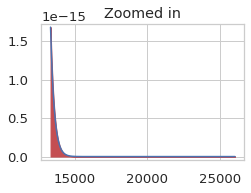

In [19]:
#zooming in the graph
ax2 = plt.subplot(222)
plt.fill_between(x,y,color='r')
ax2.margins(x=0.05, y=0.025)        
ax2.plot(x, y)
ax2.set_title('Zoomed in')


In [20]:
#caluclating practical significance
pooled_sd=np.sqrt(((engineering_size-1)*engineering_SD**2+(arts_size-1)*\
                   arts_SD**2)/(engineering_size + arts_size-2))
print("the pooled standard deviation is : ", pooled_sd)

#cohen's d calculation
cohenD=(engineering_mean-arts_mean)/pooled_sd
print("the cohen's d is : ", cohenD)

#hedge's g calculation
hedgeG=cohenD*(1-3/(4*(engineering_size+arts_size)-9))
print("the hedge's g is : ", hedgeG)

the pooled standard deviation is :  5460.438015796608
the cohen's d is :  2.437732318853525
the hedge's g is :  2.409053115102307


Text(0.5, 1.0, 'Graph of Mid-Career Median Salary vs Starting Median Salary')


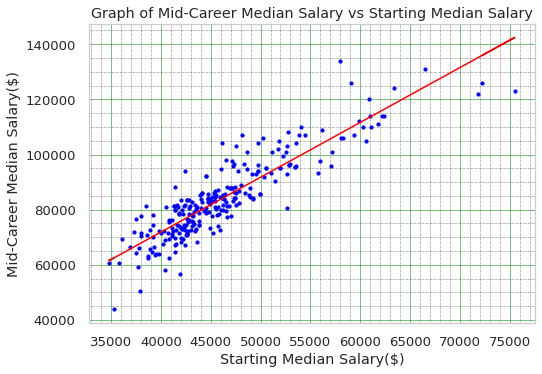

In [25]:
import seaborn as sns # very nice plotting package

# style settings
sns.set(color_codes=True, font_scale = 1.2)
sns.set_style("whitegrid")

def best_fit_slope_and_intercept(xn,yn):
    m = ((x_mean*y_mean)-mean(xn*yn))/(((x_mean)**2)-mean(xn**2))
    b= y_mean - m*mean(xn)
    return(m,b)
m,b = best_fit_slope_and_intercept(xn,yn)
regression_line=[(m*x1)+b for x1 in xn]

print(plt.title("Graph of "+ y_label +" vs "+x_label  ))

plt.ylabel(y_label+"($)")
plt.xlabel(x_label+"($)")
plt.minorticks_on()
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.scatter(x1,y1,s=10,color='blue')
plt.plot(xn,regression_line, color='red')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


R-squared =  0.792
Regression equation: y = 1.989 x +  -7699.041


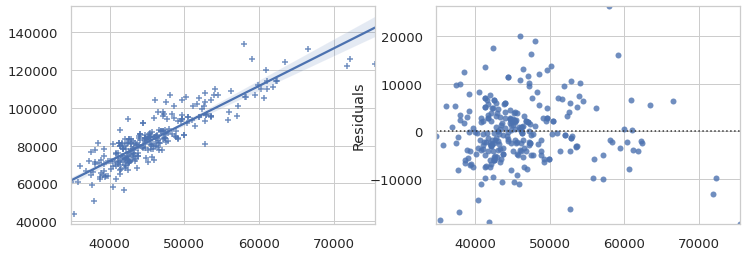

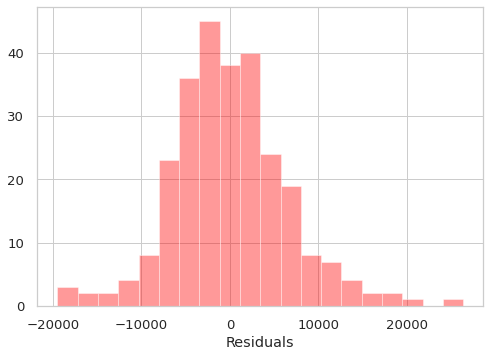

In [26]:
import statsmodels.api as statsmodels # useful stats package with regression functions
def regression_model(column_x, column_y):
    # this function uses built in library functions to create a scatter plot,
    # plots of the residuals, compute R-squared, and display the regression eqn

    # fit the regression line using "statsmodels" library:
    X = statsmodels.add_constant(column_x)
    Y = column_y
    regressionmodel = statsmodels.OLS(Y,X).fit() #OLS = "ordinary least squares"
    
    # extract regression parameters from model, rounded to 3 decimal places:
    Rsquared = round(regressionmodel.rsquared,3)
    slope = round(regressionmodel.params[1],3)
    intercept = round(regressionmodel.params[0],3)
    
    # make plots:
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(12,4))
    sns.regplot(x=column_x, y=column_y, data=df, marker="+", ax=ax1) # scatter plot
    sns.residplot(x=column_x, y=column_y, data=df, ax=ax2) # residual plot
    ax2.set(ylabel='Residuals')
    ax2.set_ylim(min(regressionmodel.resid)-1,max(regressionmodel.resid)+1)
    plt.figure() # histogram
    sns.distplot(regressionmodel.resid, kde=False, axlabel='Residuals', color='red')
    
    # print the results:
    print("R-squared = ",Rsquared)
    print("Regression equation: y =",slope, "x + ",intercept)
regression_model(xn, yn)